In [1]:
#en principio lo que uno esperaria es que si pintamos los nodos que toman alcohol en gran medida para los 3 años veriamos que crece 
import networkx as nx
import numpy as np
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show


In [2]:
#abrimos las matrices de adyacencia por amistad.
Friendship1  = np.loadtxt('friendship1.txt') 
Friendship2  = np.loadtxt('friendship2.txt') 
Friendship3  = np.loadtxt('friendship3(copia).txt')

F1=np.matrix(Friendship1)
F2=np.matrix(Friendship2)
F3=np.matrix(Friendship3)

imalos=[]
for i in range(160):
    if 1.0*(F1[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F2[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F3[i,:]==10).sum()==160:
        imalos.append(i)
        
malos=list(set(imalos))
malos=np.sort(malos)

F1=np.delete(F1, malos, axis=0)
F1=np.delete(F1,malos,axis=1)
F2=np.delete(F2, malos, axis=0)
F2=np.delete(F2,malos,axis=1)
F3=np.delete(F3, malos, axis=0)
F3=np.delete(F3,malos,axis=1)

g1=nx.from_numpy_matrix(F1,create_using=nx.DiGraph())
g2=nx.from_numpy_matrix(F2,create_using=nx.DiGraph())
g3=nx.from_numpy_matrix(F3,create_using=nx.DiGraph())



In [3]:
#tenemos las matrices de adyacencia que toma al 2 como para decir que hay un enlace 

F1Matrix = np.matrix(F1)
F1Matrix[1,87]
#g1.edges()

2.0

In [4]:
tobacco = np.loadtxt('tobacco(copia).txt',dtype=int, usecols=(0,1,2))
tobacco =np.matrix(tobacco)
tobacco=np.delete(tobacco, imalos,0)

In [5]:
tobacco1 = []
nodos = list(g1.nodes())

for k in range(len(nodos)):
    tobacco1.append(tobacco[k,0])
    
tobacco2 = []

for k in range(len(nodos)):
    tobacco2.append(tobacco[k,1])
    
    
tobacco3 = []

for k in range(len(nodos)):
    tobacco3.append(tobacco[k,2])
    

dicttobacco1 = dict()
for i in range(len(nodos)):
    #print({nodos[i] : alcohol1[i]})
    dicttobacco1.update({nodos[i] : tobacco1[i]})
    

dicttobacco2 = dict()
for i in range(len(nodos)):
    #print({nodos[i] : alcohol1[i]})
    dicttobacco2.update({nodos[i] : tobacco2[i]})
    

dicttobacco3 = dict()
for i in range(len(nodos)):
    #print({nodos[i] : alcohol1[i]})
    dicttobacco3.update({nodos[i] : tobacco3[i]})

In [6]:
#empezamos diciendo si fuma o no, solo si es 2 o 3 
#dicttobacco1
#quiero un set de los nodos que fuman 
nodosFuman = []
for nodo, fuma in dicttobacco1.items():    
    if fuma == 2 or fuma == 3:
        nodosFuman.append(nodo)
        
len(dicttobacco1.values())

134

In [7]:
#ahora ya tengo a los nodosFuman lo uqe necesito es detectarlos en la matriz de adyacencia 
#digo que las filas son los nodos target y en las columnas los amigos 
adjDeNodosTargetNoFum = np.delete(F1Matrix, nodosFuman, axis=0)


In [8]:
#ahora me pregunto si cada uno de estos nodos no fumadores 
#como es la distribucion de amigos fumadores y no fumadores 
adjDeNodosTargetNoFumAmigosNoFum = np.delete(adjDeNodosTargetNoFum, nodosFuman, axis=1)

In [9]:
adjDeNodosTargetNoFumAmigosNoFum.shape

(114, 114)

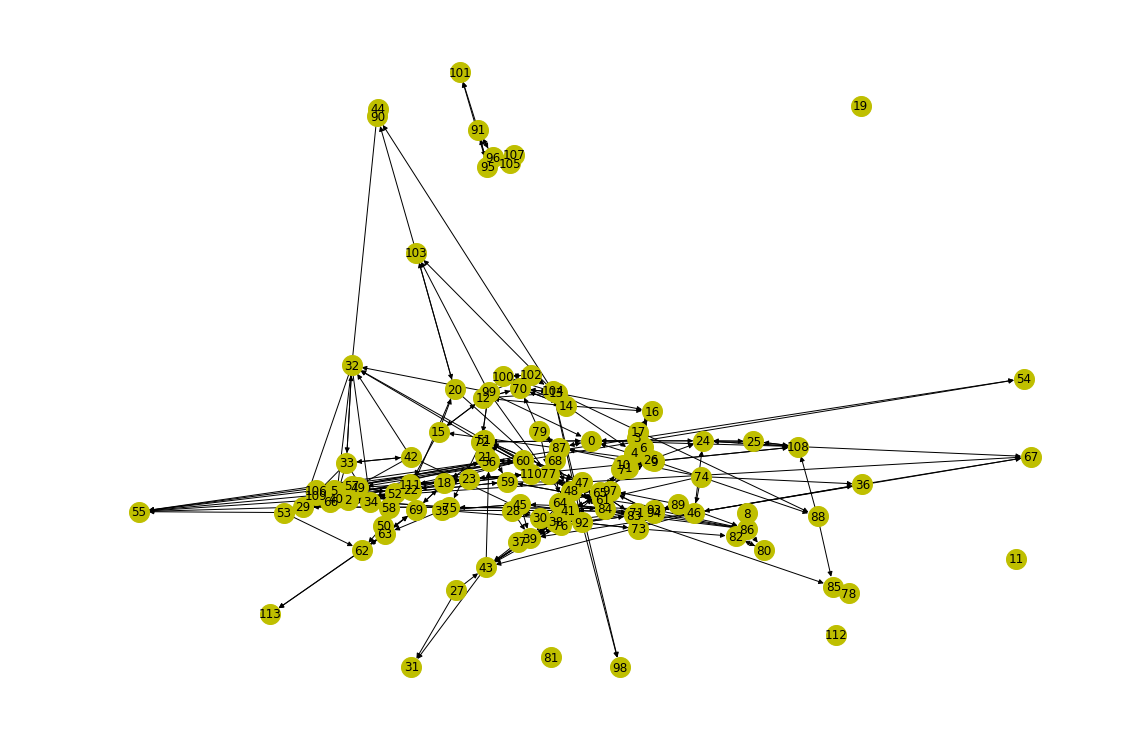

In [10]:
#dada esa adyacencia quiero ver la distribucion del indegree 
g1TargetNoFumAmigosNoFum = nx.from_numpy_matrix(adjDeNodosTargetNoFumAmigosNoFum,create_using=nx.DiGraph())
#G1_p.in_degree()
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g1TargetNoFumAmigosNoFum) 
        
nx.draw(g1TargetNoFumAmigosNoFum,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

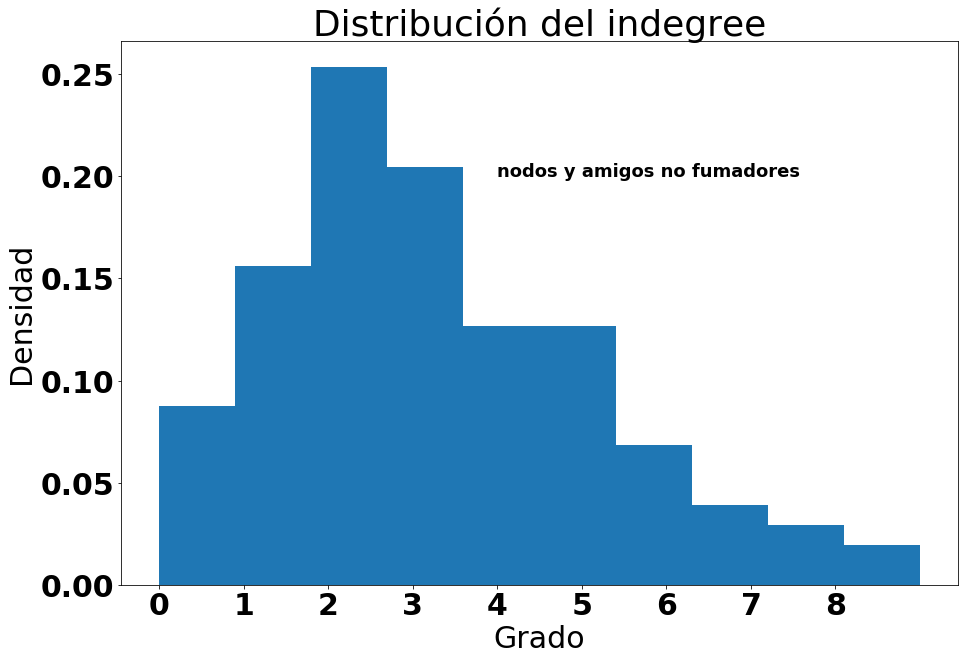

In [146]:
indegreeList = list(dict(g1TargetNoFumAmigosNoFum.in_degree()).values())
indegreeDensidad = [x / sum(indegreeList) for x in indegreeList]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}

minn = min(indegreeList)
maxx = max(indegreeList)
plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")

plt.figure(figsize=(15,10))
plt.hist(indegreeList, density=True)
plt.xticks(range(minn,maxx,1))
plt.title('Distribución del indegree')
plt.text(4,0.2,'nodos y amigos no fumadores',fontsize=18)
plt.xlabel('Grado')
plt.ylabel('Densidad')
plt.show()


In [ ]:
minn = min(indegree)
maxx = max(indegree)
print(range(minn,maxx,1))

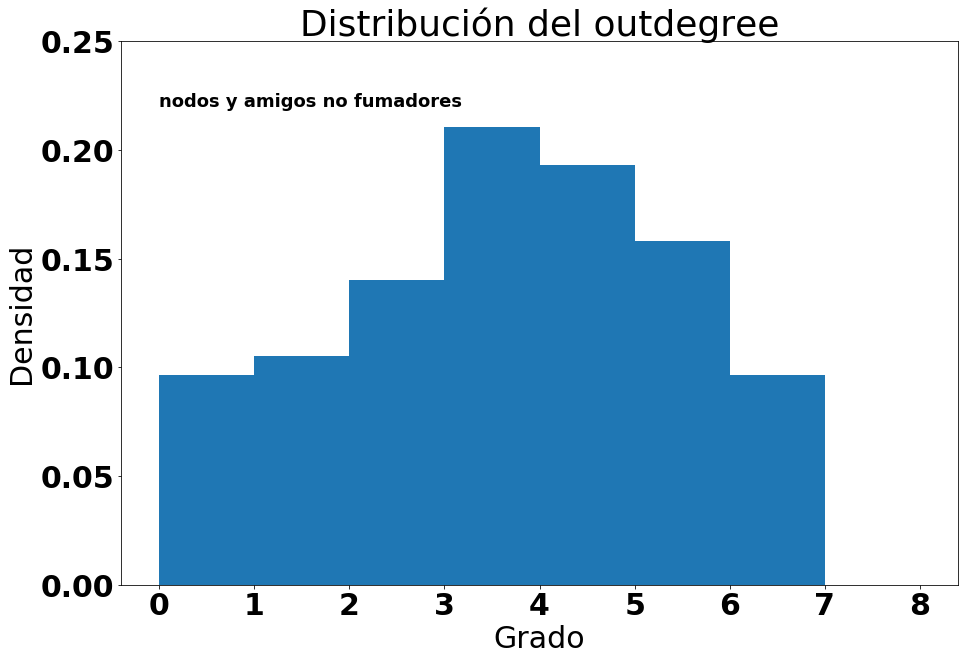

In [147]:
outdegree = list(dict(g1TargetNoFumAmigosNoFum.out_degree()).values())
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}

#minn = min(outdegree)
#maxx = max(outdegree)
plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")

plt.figure(figsize=(15,10))


plt.hist(outdegree, bins = range(minn, maxx,1), density=True)
plt.xticks(range(minn,maxx,1))
plt.yticks([0,0.05,0.1,0.15,0.2,0.25])
plt.title('Distribución del outdegree')
plt.text(0,0.22,'nodos y amigos no fumadores',fontsize=18)
plt.xlabel('Grado')
plt.ylabel('Densidad')
plt.show()



In [90]:
#quiero calcular los nodos amigos que tienen enlace en ambos sentidos 
#type(g1TargetNoFumAmigosNoFum)
#g1TargetNoFumAmigosNoFumDirect = g1TargetNoFumAmigosNoFum.to_directed()
#overall_reciprocity = dict(nx.reciprocity(g1TargetNoFumAmigosNoFum))
#type(g1TargetNoFumAmigosNoFumDirect)
#reciprocity

adjDeNodosTargetNoFumAmigosNoFumT = np.transpose(adjDeNodosTargetNoFumAmigosNoFum)
#np.size(adjDeNodosTargetNoFumAmigosNoFum)
#np.intersect1d(adjDeNodosTargetNoFumAmigosNoFum, adjDeNodosTargetNoFumAmigosNoFumT)

12996

In [110]:
len(g1TargetNoFumAmigosNoFum.nodes())
type(adjDeNodosTargetNoFumAmigosNoFum[1,:])
Adj = np.zeros((len(g1TargetNoFumAmigosNoFum.nodes()),len(g1TargetNoFumAmigosNoFum.nodes())))
np.shape(Adj)

(114, 114)

In [112]:
def mutualAdj(graph, adj):
    Adj = np.zeros((len(graph.nodes()),len(graph.nodes())))
    for i in range(len(graph.nodes())):
        for j in range(len(graph.nodes())):
            elem = adj[i,j]
            elemT = np.transpose(adj)[i,j]
            if elem == elemT:
                Adj[i,j] = adj[i,j]
            else:
                Adj[i,j] = 0
    return Adj

In [125]:
recAdjNoFumNoFum = mutualAdj(g1TargetNoFumAmigosNoFum, adjDeNodosTargetNoFumAmigosNoFum)
#np.where(recAdj[1,:] != 0),np.where(adjDeNodosTargetNoFumAmigosNoFum[1,:] != 0),np.where(adjDeNodosTargetNoFumAmigosNoFumT[1,:] != 0)
#adjDeNodosTargetNoFumAmigosNoFum[1,:]
#adjDeNodosTargetNoFumAmigosNoFum[]
#np.where(recAdj[1,:] != 0)
gRecAdjNoFumNoFum =  nx.from_numpy_matrix(recAdjNoFumNoFum,create_using=nx.DiGraph())

In [142]:
reciprocity = np.array(list(dict(gRecAdjNoFumNoFum.degree()).values()))
minn = min(reciprocity)
maxx = max(reciprocity)
np.where(reciprocity ==10)[0]
2/144

0.013888888888888888

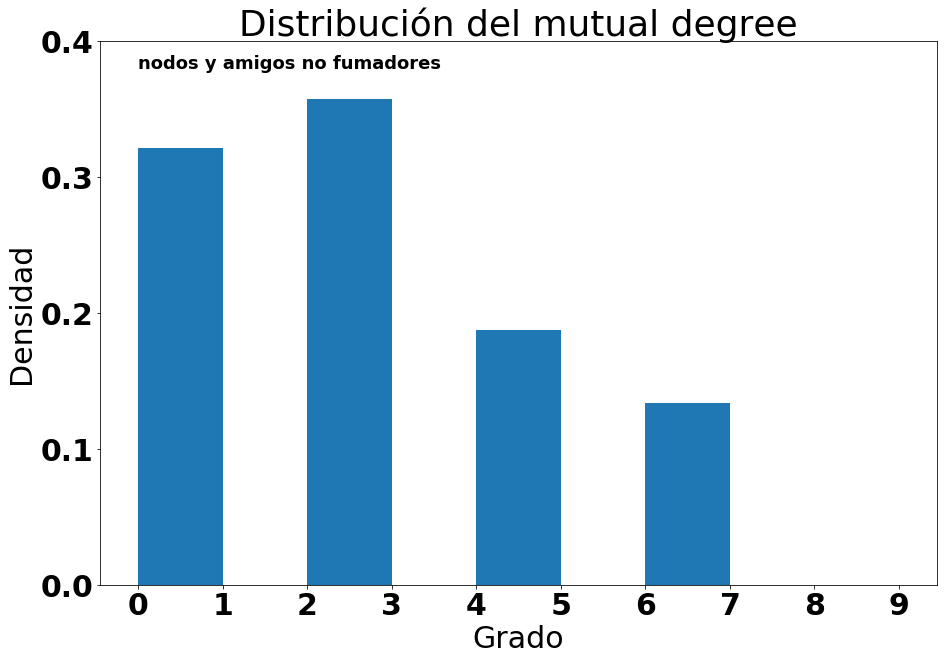

In [158]:

reciprocity = list(dict(gRecAdjNoFumNoFum.degree()).values())
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}


plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")
minnR = min(reciprocity)
maxxR = max(reciprocity)
plt.figure(figsize=(15,10))


plt.hist(reciprocity, bins = range(minnR, maxxR,1), density=True)
plt.xticks(range(minnR,maxxR,1))
plt.yticks([0,0.1,0.2, 0.3,0.4])
plt.title('Distribución del mutual degree')
plt.text(0,0.38,'nodos y amigos no fumadores',fontsize=18)
plt.xlabel('Grado')
plt.ylabel('Densidad')
plt.show()


In [ ]:
outdegree

In [151]:
#ahora quiero ver la distribucion del indegree por amigos fumadores 
#me quedo solo con los nodosFuman 
#g1.nodes()
#for k in nodosFuman:
nodos = range(0, len(g1.nodes()),1) 
#len(nodos)
nodosNoFuman = np.delete(nodos, nodosFuman)

In [152]:
F1Matrix = np.matrix(F1)

adjDeNodosTargetFum = np.delete(F1Matrix, nodosNoFuman, axis=0)
adjDeNodosTargetFumAmigosFum = np.delete(adjDeNodosTargetFum, nodosNoFuman, axis=1)
g1TargetFumAmigosFum = nx.from_numpy_matrix(adjDeNodosTargetFumAmigosFum,create_using=nx.DiGraph())


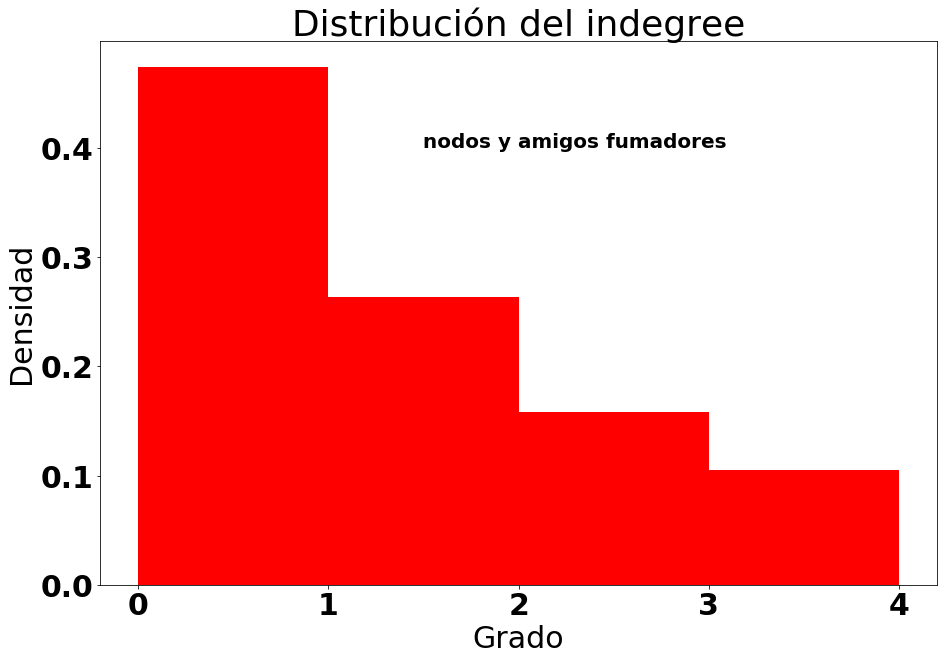

In [154]:
indegree = list(dict(g1TargetFumAmigosFum.in_degree()).values())
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}

minn = min(indegree)
maxx = max(indegree)
plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")

plt.figure(figsize=(15,10))

plt.hist(indegree, range(minn,maxx,1), density = True, color = 'red')
plt.xticks(range(minn,maxx,1))
plt.title('Distribución del indegree')
plt.text(1.5,0.4,'nodos y amigos fumadores',fontsize=20)
plt.xlabel('Grado')
plt.ylabel('Densidad')
plt.xticks(range(minn,maxx,1))
#plt.yticks([0,0.05,0.1,0.15,0.2,0.25])
plt.show()


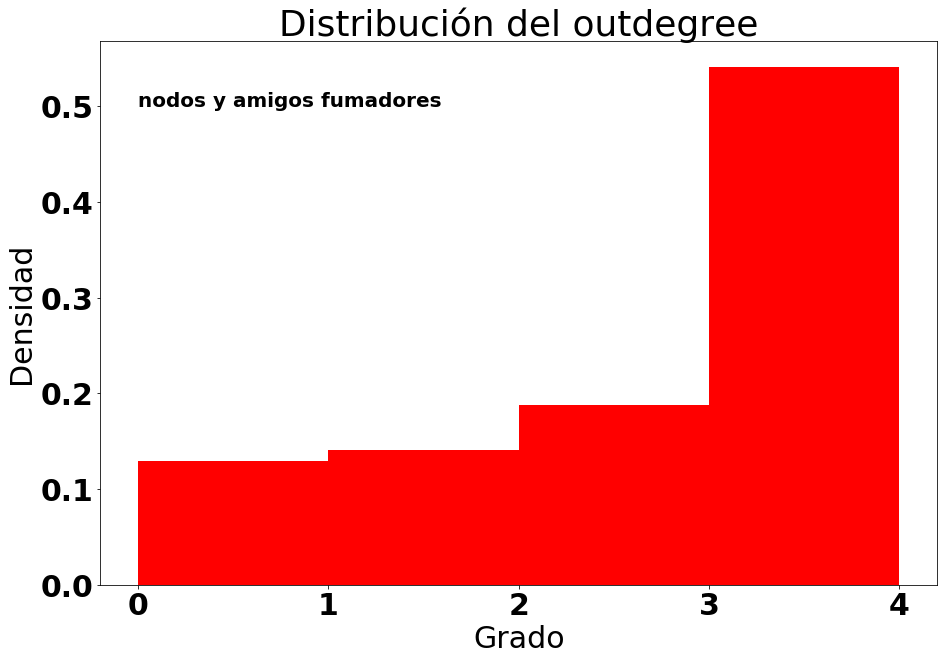

In [155]:
indegree = list(dict(g1TargetFumAmigosFum.out_degree()).values())
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}

#minn = min(outdegree)
#maxx = max(outdegree)
plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")

plt.figure(figsize=(15,10))

plt.hist(outdegree, range(minn,maxx,1), density = True, color = 'red')
plt.xticks(range(minn,maxx,1))
plt.title('Distribución del outdegree')
plt.text(0,0.5,'nodos y amigos fumadores',fontsize=20)
plt.xlabel('Grado')
plt.ylabel('Densidad')
plt.xticks(range(minn,maxx,1))
#plt.yticks([0,0.05,0.1,0.15,0.2,0.25])
plt.show()


In [159]:
recAdjFumFum = mutualAdj(g1TargetFumAmigosFum, adjDeNodosTargetFumAmigosFum)
gRecAdjFumFum =  nx.from_numpy_matrix(recAdjFumFum,create_using=nx.DiGraph())

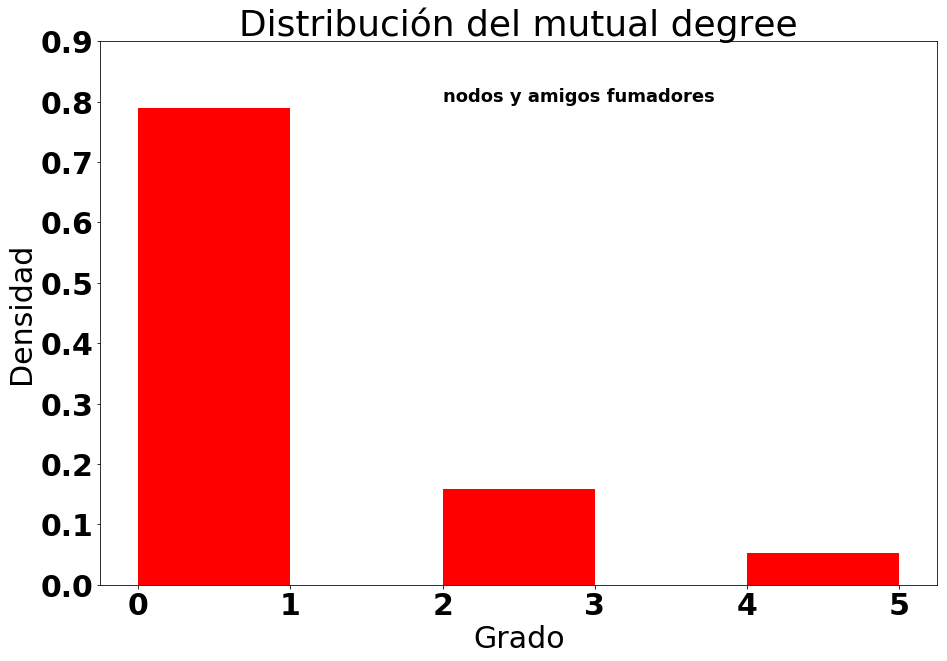

In [162]:

reciprocity = list(dict(gRecAdjFumFum.degree()).values())
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}


plt.rc('font', **font)
#plt.title("Cantidad de nodos por comunidad")
minnR = min(reciprocity)
maxxR = max(reciprocity)
plt.figure(figsize=(15,10))


plt.hist(reciprocity, bins = range(minnR, maxxR,1), density=True, color = 'red')
plt.xticks(range(minnR,maxxR,1))
plt.yticks([0,0.1,0.2, 0.3,0.4, 0.5,0.6,0.7,0.8,0.9])
plt.title('Distribución del mutual degree')
plt.text(2,0.8,'nodos y amigos fumadores',fontsize=18)
plt.xlabel('Grado')
plt.ylabel('Densidad')
plt.show()
